In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
except:
	pass


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Some extra stuff to stop complaints when plotting the data column
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


 ## Load the database

In [3]:
db = pd.read_pickle('data/data_formatted.pkl')
db.describe()
print(db.dtypes)


Date            datetime64[ns]
Miles                  float64
Gas Pumped             float64
Price/Gal              float64
Car MPG                float64
Avg Spd                float64
Car gas                float64
Price/Barrel           float64
Real MPG               float64
paid ($)               float64
Latitude               float64
Longitude              float64
notes                   object
dtype: object


 So it looks like we have about 116 entries, with a few missing in the 'Miles',
 'Real MPG', 'Avg Spd', and 'paid ($)' columns. What we would like to do now
 is visualize the actual data using matplotlib

 ## Changing fuel prices over time
 The following plot shows how the price I paid for fuel changed over the course
 of 3 years

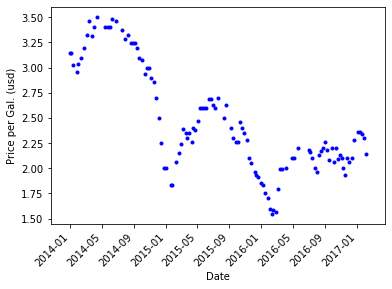

In [8]:
# Plot the price of fuel over time
plt.xlabel('Date')
plt.ylabel('Price per Gal. (usd)')
plt.xticks(rotation=45, ha='right')
plt.scatter(db.Date, db['Price/Gal'], color='blue', marker='.')

#%% [markdown]
# You might notice that there was a huge drop in the cost of fuel in the summer
# of 2014. I've also included the cost per barrel of crude, so we can check and
# see if the trend in fuel price tracks the trend in barrels of oil price


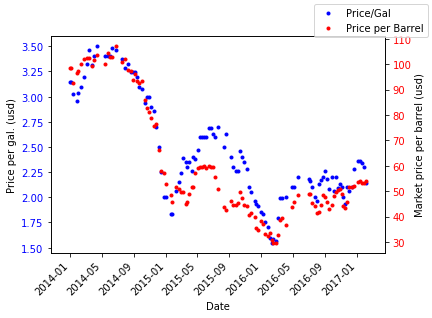

In [5]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Price per gal. (usd)')
plt.xticks(rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')
# Plot 'Price/Gal'
ax1.scatter(db.Date, db['Price/Gal'], color='blue', marker='.', label='Price/Gal')
ax2 = ax1.twinx()
ax2.set_ylabel('Market price per barrel (usd)')
ax2.scatter(db.Date, db['Price/Barrel'], color='red', marker='.', label='Price per Barrel')
ax2.tick_params(axis='y', labelcolor='red')
fig.legend()


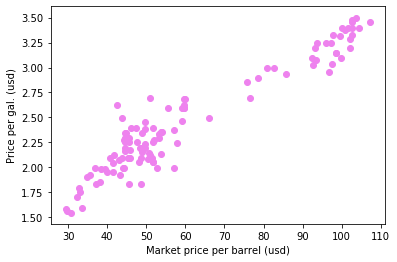

In [6]:
# Plot the two prices against each other
plt.ylabel('Price per gal. (usd)')
plt.xlabel('Market price per barrel (usd)')
plt.scatter(db['Price/Barrel'], db['Price/Gal'], color='violet')


 Look at how correlated those two prices are! It makes me a little less dubious
 that the prices are somehow being manipulated, other than possibly by the
 people producing the oil...

 ## Car and Real MPG over time
 The following plot shows the distribution of miles-per-gallon (MPG) over time.
 I was able to record two different MPG values:
 * Car MPG: The average MPG for a single tank as reported by my car's dashboard
 * Real MPG: The MPG calculated by dividing the number of miles I drove
   (reported by my car) divided by the number of gallons I put in after that
   drive

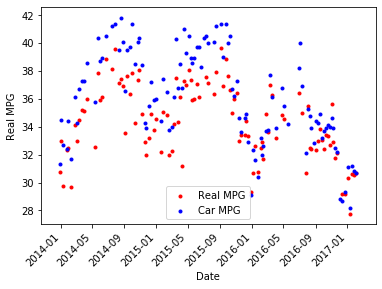

In [7]:
# Setup the axes
plt.xlabel('Date')
plt.ylabel('Real MPG')
plt.xticks(rotation=45, ha='right')
plt.scatter(db.Date, db['Real MPG'], color='red', marker='.', label='Real MPG')
plt.scatter(db.Date, db['Car MPG'], color='blue', marker='.', label='Car MPG')
plt.legend() # Identify the values


 This is interesting. It looks like my car was reporting a higher value of MPG
 than I actually was using! That suggests my car was doing something funny.

 If we look, though, at 2016 it appears the difference between my car and the
 actual MPG get's a little closser together, so let's see if this is actually
 correct. I'll do that by plotting a distribution of 'Real-Car MPG'